# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

#### Import traffic sign names from csv file

In [2]:
import csv

def load_traffic_sign_names(csvfile):
    signnames = dict()
    with open(csvfile, 'r') as f:
        for line in f.readlines():
            array = line.split(',')
            signnames[array[0]] = array[1]
    return signnames
        
sign_names = load_traffic_sign_names('signnames.csv')


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def show_sample(img, y_data):
    plt.figure(figsize=(1,1))
    plt.title(sign_names[str(y_data)], fontsize=8)
    plt.tick_params(axis='both', which='major', labelsize=6)
    plt.imshow(img)

#### Test sample

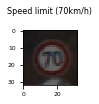

In [5]:
index = random.randint(0, len(X_train))
show_sample(X_train[index], y_train[index])

#### Train sample

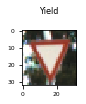

In [6]:
index = random.randint(0, len(X_test))
show_sample(X_test[index], y_test[index])

In [7]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [8]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


Number of training examples = 39209
Number of testing examples = 12630


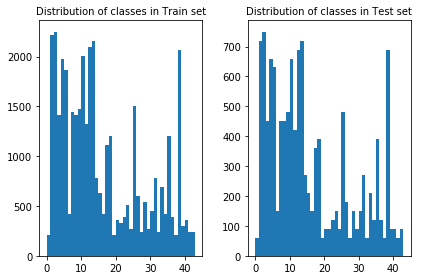

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.set_title('Train', fontsize=8)

bins = range(n_classes + 1)
ax1.hist(y_train, bins=bins)
ax1.set_title('Distribution of classes in Train set', fontsize=10)

ax2.hist(y_test, bins=bins)
ax2.set_title('Distribution of classes in Test set', fontsize=10)

plt.tight_layout()

print("Number of training examples =", len(y_train))
print("Number of testing examples =", len(y_test))    

As we can see from histograms, there is big difference between the classes in the train set. For example, the class 0 is presented by less that 200 samples. It would be better to generate additional samples (data augmentation) using small random translation along X and Y, rotation and, as optional, perspective distortion (can be approximated by affine transformation) to reduce the probable bias of network towards some classes.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

#### Data augmentation

Number of training examples = 55499
Number of testing examples = 12630


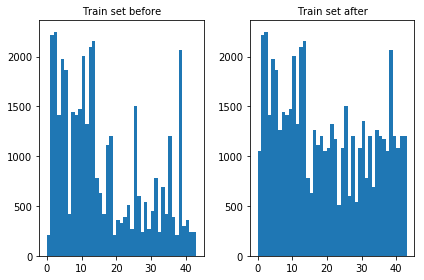

In [11]:
### Data augmentation on the fly

import cv2

DATA_AUGMENTATION = True # enable/disable

import random
random.seed(a=13)

translate_dist = 5
rotate_dist = 20 # degree

def generate_params():    
    tx = random.randint(0, 2*translate_dist) - translate_dist
    ty = random.randint(0, 2*translate_dist) - translate_dist
    angle = random.uniform(0.0, 2*rotate_dist) - rotate_dist
    return tx, ty, angle

def generate_sample(im):
    tx, ty, angle = generate_params()
    w = im.shape[0]
    h = im.shape[1]
    M = cv2.getRotationMatrix2D((w/2,h/2),angle,1)
    im = cv2.warpAffine(im,M,(w,h))   
    return im        

def get_class_samples(hist, X_data, y_data):
    
    class_dict = dict()
    class_set = set()
    
    h_min = np.min(hist)
    h_max = np.max(hist)

    target = int((h_max - h_min) / 4)

    for i in range(len(X_data)):
        cls_n = y_data[i]
        num = hist[cls_n]
        if num < target:
            item = class_dict.get(str(cls_n))
            if item is None:
                class_dict[str(cls_n)] = list()
            item = class_dict[str(cls_n)]
            item.append(X_data[i])
            class_set.add(cls_n)
            
    return class_dict, class_set

def data_augmentation(hist, X_data, y_data):
    X_gen = list()
    y_gen = list()
    
    counter_cls_dict = dict()

    h_min = np.min(hist)
    h_max = np.max(hist)

    target = int((h_max - h_min)/2)
    
    train_dict, train_cls = get_class_samples(hist, X_data, y_data)
    for cls in train_cls:
        samples = train_dict[str(cls)]
        n_samples = len(samples)
        
        count = int(target / n_samples)
        counter_cls_dict[str(cls)] = count
        
        for n in range(count):
            for im in samples:
                X_gen.append(generate_sample(im))
                y_gen.append(cls)
            
    X_gen = np.asarray(X_gen, dtype=X_train.dtype)
    y_gen = np.asarray(y_gen, dtype=y_train.dtype)
  
    counter_cls_dict['classes_set'] = train_cls
    
    return X_gen, y_gen, counter_cls_dict


# Do data augmentation
if DATA_AUGMENTATION:
    
    global X_train
    global y_train
    
    y_train_init = y_train
    
    train_hist = np.histogram(y_train, bins=range(n_classes+1))
    X_gen, y_gen, counter_cls_dict = data_augmentation(train_hist[0], X_train, y_train)
    assert (len(X_gen)==len(y_gen))
    if (len(X_gen)):
        X_train = np.append(X_train, X_gen, axis=0)
        y_train = np.append(y_train, y_gen, axis=0)
        train_hist = np.histogram(y_train, bins=range(n_classes+1))

    # Draw histograms
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.set_title('Train', fontsize=8)

    bins = range(n_classes+1)
    ax1.hist(y_train_init, bins=bins)
    ax1.set_title('Train set before', fontsize=10)

    ax2.hist(y_train, bins=bins)
    ax2.set_title('Train set after', fontsize=10)

    plt.tight_layout()
    
n_train = len(y_train)

print("Number of training examples =", len(y_train))
print("Number of testing examples =", len(y_test))    

In [12]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [13]:
Input_channels = 3 # number of channels in input images

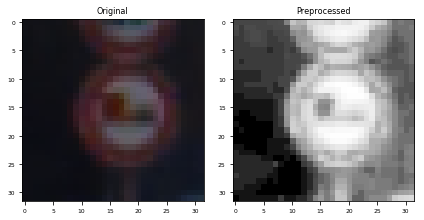

In [14]:
# Extract Y channel from color image and use it as input image for LeNet-5
# Preprocessing: histogram equalization

import cv2

def preprocess_images(inputImgs):
    # Convert to gray image, equalize it and add expand dimension
    imgs = np.ndarray((inputImgs.shape[0], 32, 32, 1), dtype=np.uint8)
    for i, img in enumerate(inputImgs):
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        yuv = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        img, u, v = cv2.split(yuv)       
        img = cv2.equalizeHist(img)
        img = np.expand_dims(img, axis=2)
        imgs[i] = img
    return imgs
     
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# Original sample
index = random.randint(0, len(X_train))
ax1.set_title('Original', fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=6)
ax1.imshow(X_train[index])

# Preprocessing
X_train = preprocess_images(X_train)
X_test = preprocess_images(X_test)

# Preprocessed sample
ax2.set_title('Preprocessed', fontsize=8)
ax2.tick_params(axis='both', which='major', labelsize=6)
gr = np.squeeze(X_train[index], axis=2)
ax2.imshow(np.dstack((gr,gr,gr)))

plt.tight_layout()

Input_channels = 1 # now input images are gray

#### Centering and normalization

In [15]:
def center_and_normaize_image(images, mean, std):
    images = images.astype('float32')
    images -= mean
    images /= std
    return images

# Centering and normalization
MEAN = np.mean(X_train)
STD = np.std(X_train)

X_train = center_and_normaize_image(X_train, MEAN, STD)
X_test = center_and_normaize_image(X_test, MEAN, STD)

print("mean = {:.3f}".format(MEAN))
print("std = {:.3f}".format(STD))

mean = 129.803
std = 74.914


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Extracted luminance Y channel from input RGB images, preprocessed and used them as input images for LeNet-5 model. Removing color information allows to increase the speed of training and better learn and extract structures, used to classify the traffic signs.

Preprocessing:

Histogram equalization for Y channel to improve the contrast in an image of sign. Disadvantage of equalization is reducing some details in signs.

In [16]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#### Data augmentation

In [17]:
# See Data augmentation on the fly above!

#### Splitting train set on tran set and validation set

In [18]:
TEST_SIZE = 0.2

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=TEST_SIZE, random_state=0)

# Number of training examples
n_train = len(X_train)

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))

print("Number of training examples =", n_train)
print("Number of validation examples =", len(X_validation))
print("Number of testing examples =", n_test)

Number of training examples = 44399
Number of validation examples = 11100
Number of testing examples = 12630


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I added centering and normalization of preprocessed images (Y channel). To get the same result during validation and evaluation of model, I centered and normalized X_validation and X_test sets using mean and std values, calculated on X_train set.

Added data augmentation for low presented classes to reduce large difference between classes: generated additional data samples using small random translation along X and Y and rotation to reduce the probable bias of network towards some classes. it is better to do data augmentation to boost the performance especially. Moreover, data augmentation is usefull for training a deep network. As you can see from histograms above (see Data augmentation section), I generated additional samples for low presented classes.

In [19]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [20]:
# Setup TensorFlow

import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128
LEARNING_RATE = 0.001
KEEP_PROP = 0.5
BETA = 0.00001#0.0001

** Architecture **

In [21]:
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob, input_channels):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_channels, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    # L2 regularization
    l2reg = BETA * tf.nn.l2_loss(conv1_W) + BETA * tf.nn.l2_loss(conv1_b) 
    l2reg = l2reg + BETA * tf.nn.l2_loss(conv2_W) + BETA * tf.nn.l2_loss(conv2_b) # +
    l2reg = l2reg + BETA * tf.nn.l2_loss(fc1_W) + BETA * tf.nn.l2_loss(fc1_b) #+
    l2reg = l2reg + BETA * tf.nn.l2_loss(fc2_W) + BETA * tf.nn.l2_loss(fc2_b) # +
    l2reg = l2reg + BETA * tf.nn.l2_loss(fc3_W) + BETA * tf.nn.l2_loss(fc3_b)
        
    return logits, l2reg

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I uses modified version of LeNet-5 as the initial model to build traffic sign classifier.

** Input **

The LeNet architecture accepts a 32x32xC image as input, where C=1 is the number of channels.

** Architecture **

Layer 1: Convolutional. The output shape should be 28x28x6.

Activation. Relu.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation. Relu.

Pooling. The output shape should be 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.

Activation. Relu.

Dropout.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. Relu.

Dropout.

Layer 5: Fully Connected (Logits). This should have 43 outputs.

** Output **

Return the result of the 2nd fully connected layer.

In [22]:
### Train your model here.
### Feel free to use as many code cells as needed.


#### Features and Labels
x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [23]:
x = tf.placeholder(tf.float32, (None, 32, 32, Input_channels))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, n_classes)

#### Training Pipeline
Create a training pipeline that uses the model to classify traffic signs.

In [24]:
logits, l2reg = LeNet(x, keep_prob, Input_channels)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy + l2reg)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

#### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [25]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [26]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROP})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.744

EPOCH 2 ...
Validation Accuracy = 0.845

EPOCH 3 ...
Validation Accuracy = 0.898

EPOCH 4 ...
Validation Accuracy = 0.924

EPOCH 5 ...
Validation Accuracy = 0.929

EPOCH 6 ...
Validation Accuracy = 0.949

EPOCH 7 ...
Validation Accuracy = 0.957

EPOCH 8 ...
Validation Accuracy = 0.961

EPOCH 9 ...
Validation Accuracy = 0.965

EPOCH 10 ...
Validation Accuracy = 0.967

EPOCH 11 ...
Validation Accuracy = 0.970

EPOCH 12 ...
Validation Accuracy = 0.973

EPOCH 13 ...
Validation Accuracy = 0.975

EPOCH 14 ...
Validation Accuracy = 0.974

EPOCH 15 ...
Validation Accuracy = 0.979

EPOCH 16 ...
Validation Accuracy = 0.980

EPOCH 17 ...
Validation Accuracy = 0.980

EPOCH 18 ...
Validation Accuracy = 0.979

EPOCH 19 ...
Validation Accuracy = 0.981

EPOCH 20 ...
Validation Accuracy = 0.982

EPOCH 21 ...
Validation Accuracy = 0.982

EPOCH 22 ...
Validation Accuracy = 0.984

EPOCH 23 ...
Validation Accuracy = 0.984

EPOCH 24 ...
Validation Accura

#### Evaluate the Model
Evaluate the performance of the model on the test set when model is completely finished.

In [27]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.946


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

1. During the first step I trained LeNet-5 with rgb traffic signs to understand the base accurancy of the model with the following hyperparams: EPOCHS = 10, BATCH_SIZE = 128, Learning_rate = 0.001. I got the Validation Accurancy = 94.1%.

2. During the second step to improve performance of learning, I converted input RGB images to gray (extracting Y channel form YUV) with some preprocessing (see above), added centering and normalization of images. I got the Validation Accurancy = 96% using the same hyperparams: EPOCHS = 10, BATCH_SIZE = 128, Learning_rate = 0.001. The same model with EPOHS = 100 gives the Validation Accurancy = 98% (validation accuracy fluctuates around 0.98 after epoh > 47).

3. To improve generalization of classifier (decreasing overfitting of model), added L2 regularization into loss function and Dropout into full connected layers. EPOHS = 100, KEEP_PROP=0.5, BETA=0.00001 with augmentation gives the Validation Accurancy = 99%

4. Evaluated generalization of model on the test set after the model has been fixed. Test Accuracy = 94.6%.

I used Adaptive Moment Estimation (Adam) gradient descent optimization algorithm to automate computing of adaptive learning rate.

Final hyperparameters of model:

EPOCHS = 100

BATCH_SIZE = 128

KEEP_PROP=0.5

BETA=0.00001

LEARNING_RATE=0.001

Training of model:
Initial hyperparameters of LeNet-5 is quite good as initial values for trainig: EPOCHS=10, BATCH_SIZE = 128, LEARNING_RATE=0.001. To optimize EPOHS, I changed EPOHS with some step like 20 to increase Validation Accurance. 
L2 regularization parameter was initialized by 0.00001 (typical values of L2 regularization parameter are on orders of 3 or 4 for convolutional network). It is posible to use Tensorboard for visualization of filters to setup optimal value of L2 regularization by trying to get more smooth learned filters.



### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with well-known implementation of model LeNet-5, used to solve quite similar problem. Architecture of LeNet-5 learns and extracts main features of digital numbers, which are presented in the shape of numbers. The same model can be used for classification of traffic signs too, based of the shapes of signs. I adapted LeNet-5 model for the clasification problem of sign by adding dropout and L2 regularization to improve generalization of the model. Preprocessing of input images allows to improve performace of feature learning by the model. More deep adaptation of model for classification of signs takes more time: changing number of convolutional layers, dimension of learned filters (patched), modification of number neurons in hidden layers.   

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [29]:
import cv2

def read_image_rgb(file):
    # returns BGR
    srcBGR = cv2.imread(file)
    return cv2.cvtColor(srcBGR, cv2.COLOR_BGR2RGB)

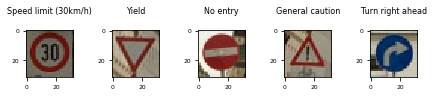

In [30]:
# Preparing test set from new images

import matplotlib.pyplot as plt
%matplotlib inline

new_images_set = [['new_images/im-01.jpg', 1],
                  ['new_images/im-13.jpg', 13],
                  ['new_images/im-17.jpg', 17],
                  ['new_images/im-18.jpg', 18],
                  ['new_images/im-33.jpg', 33],
                 ]

n_new_images = len(new_images_set)

X_test_new = np.ndarray((n_new_images, 32, 32, 3), dtype=np.uint8)
#y_test_new = np.zeros((n_new_images, n_classes), dtype=y_test.dtype)
y_test_new = np.zeros((n_new_images), dtype=y_test.dtype)

new_images = X_test_new

# load samples
for i, im, in enumerate(new_images_set):
    n_class = im[1]
    X_test_new [i] = read_image_rgb(im[0])
    y_test_new [i] = n_class

# display samples
def show_sample(ax, index):
    ax.set_title(sign_names[str(y_test_new[index])], fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    ax.imshow(X_test_new[index])
    
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5)

show_sample(ax1, 0)
show_sample(ax2, 1)
show_sample(ax3, 2)
show_sample(ax4, 3)
show_sample(ax5, 4)

plt.tight_layout()    

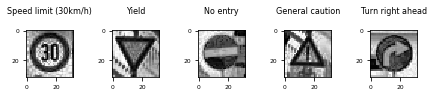

In [31]:
# Preprocessing of new images

X_test_new = preprocess_images(X_test_new)

def show_sample(ax, index):
    ax.set_title(sign_names[str(y_test_new[index])], fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=6)
    gr = np.squeeze(X_test_new[index], axis=2)
    ax.imshow(np.dstack((gr,gr,gr)))

# Preprocessed samples
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5)

show_sample(ax1, 0)
show_sample(ax2, 1)
show_sample(ax3, 2)
show_sample(ax4, 3)
show_sample(ax5, 4)

plt.tight_layout()

# Centering and normalization
X_test_new = center_and_normaize_image(X_test_new, MEAN, STD)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In common case, perspective distortion and low contrast may create difficulties during classification. But, in my case, it's not actual.

In [32]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

softmax_prob = None
accuracy = None

softmax = tf.nn.softmax(logits)

def prediction(X_data, y_data):
    sess = tf.get_default_session()
    return sess.run(softmax, feed_dict={x: X_data, y: y_data, keep_prob: 1.0})

# Running the preditions
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax_prob = prediction(X_test_new, y_test_new)

In [33]:
# Accuracy of prediction
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_test_new, y: y_test_new, keep_prob: 1.0})
    print("Test Accuracy = {:.3f}".format(accuracy))

Test Accuracy = 1.000


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The accuracy of predictions on new images is 100%.

In [34]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

#print("softmax_prob = ", softmax_prob)

def calc_top_k(probs):
    top_k = None
    with tf.Session() as sess:
        top_k = sess.run(tf.nn.top_k(tf.constant(probs), k=n_new_images))
    return top_k

In [102]:
def show_softmax_prob(index, img, n_class, top_k_prob, top_k_clases):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    fig.set_figsize = (20, 20)
    ax1.set_title('Image', fontsize=8)
    ax1.imshow(img)
    
    figsize=(20,10)
    
    ax2.set_title('Probability of top 5 classes', fontsize=8)
    n_classes = np.arange(len(top_k_clases))
    
    class_name = list()
        
    for i in range(len(top_k_clases)):
        class_name.append(sign_names[str(top_k_clases[i])])
    
    # adds dummy element to shift labels on one position to the right.
    n_classes = np.add(n_classes, 1)
    class_name.insert(0, 'none')

    width = 1/1.5
    ax2.bar(n_classes, top_k_prob, width, color="blue")
    ax2.set_xticklabels(class_name, rotation='vertical')
    ax2.tick_params(axis='both', which='major', labelsize=8)
    
    plt.tight_layout()


In [103]:
top_k = calc_top_k(softmax_prob)

#### Sample 0: probability of top 5 classes

In [104]:
print(top_k[0][0])

[  1.00000000e+00   4.53237335e-15   1.48190680e-15   1.05531242e-15
   8.03239421e-19]


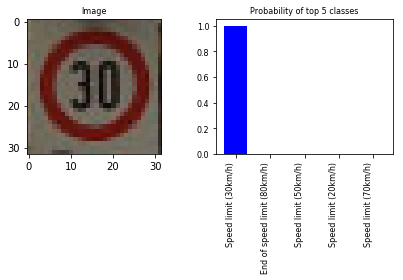

In [105]:
show_softmax_prob(0, new_images[0], y_test_new, top_k[0][0], top_k[1][0])


#### Sample 1: probability of top 5 classes

In [106]:
print(top_k[0][1])

[  1.00000000e+00   5.52842483e-09   4.99893286e-11   1.13651641e-15
   5.66119182e-16]


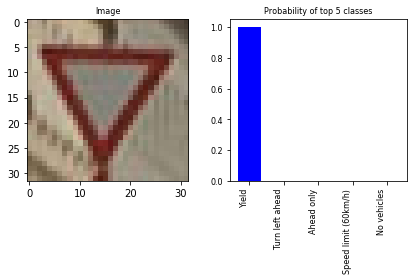

In [107]:
show_softmax_prob(1, new_images[1], y_test_new, top_k[0][1], top_k[1][1])

#### Sample 2: probability of top 5 classes

In [108]:
print(top_k[0][2])

[  1.00000000e+00   1.55759433e-10   2.85753487e-11   4.23475858e-20
   4.54817263e-21]


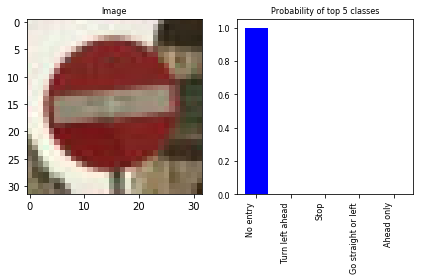

In [109]:
show_softmax_prob(2, new_images[2], y_test_new, top_k[0][2], top_k[1][2])

#### Sample 3: probability of top 5 classes

In [110]:
print(top_k[0][3])

[  1.00000000e+00   6.23887964e-12   1.37961127e-12   4.26192691e-13
   4.49589503e-14]


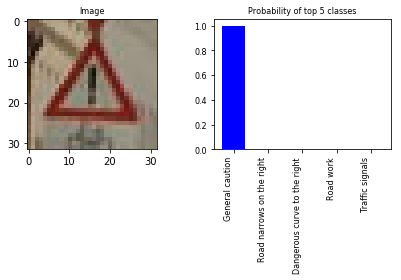

In [111]:
show_softmax_prob(3, new_images[3], y_test_new, top_k[0][3], top_k[1][3])

#### Sample 4: probability of top 5 classes

In [112]:
print(top_k[0][4])

[  1.00000000e+00   6.95135338e-11   5.31713597e-11   4.47163973e-11
   3.21606806e-15]


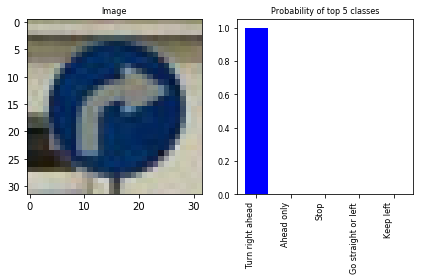

In [113]:
show_softmax_prob(4, new_images[4], y_test_new, top_k[0][4], top_k[1][4])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

All 5 predictions are correct (see above).

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.